# Word Embeddings  using Word2Vec and FastText for Medical Clinical trial Search Engine

In [1]:
import streamlit as st  #importing streamlit liabrary

In [2]:
import pandas as pd
import numpy as np
import gensim
from gensim.models import Word2Vec
from gensim.models import FastText
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [3]:
import matplotlib.pyplot as plt # our main display package
import plotly.graph_objects as go
import string # used for preprocessing
import re # used for preprocessing
import nltk # the Natural Language Toolkit, used for preprocessing
import numpy as np # used for managing NaNs
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords # used for preprocessing
from nltk.stem import WordNetLemmatizer # used for preprocessing
from sklearn.model_selection import train_test_split
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sudhanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sudhanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sudhanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# To supress future warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

# Importing datasets 

In [5]:
covid_df=pd.read_csv('../input/Dimension-covid.csv')   #for preprocessing
covid_df2=pd.read_csv('../input/Dimension-covid.csv')  #for returning results

# Preprocessing data 

In [6]:
# understand the data
covid_df.shape

(10666, 21)

In [7]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10666 entries, 0 to 10665
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Date added                       10666 non-null  object
 1   Trial ID                         10666 non-null  object
 2   Title                            10666 non-null  object
 3   Brief title                      10287 non-null  object
 4   Acronym                          3558 non-null   object
 5   Abstract                         10664 non-null  object
 6   Publication date                 10666 non-null  object
 7   Active years                     9688 non-null   object
 8   Phase                            4236 non-null   object
 9   Conditions                       9627 non-null   object
 10  Intervention                     7789 non-null   object
 11  Gender                           10666 non-null  object
 12  Registry                        

In [8]:
covid_df.head()
covid_df.tail()

,Date added,Trial ID,Title,Brief title,Acronym,Abstract,Publication date,Active years,Phase,Conditions,...,Gender,Registry,Investigators/Contacts,Sponsors/Collaborators,GRID IDs,Country of Sponsor/Collaborator,Collaborating Funders,Funder Country,Source Linkout,Dimensions URL
0,2021-06-04,NCT04912934,The Relationship Between Coronavirus Anxiety L...,The Relationship Between COVID-19 Anxiety Leve...,COVID-19,The aim was to determine the coronavirus anxie...,2020-06-20,2020,NaN,COVID-19; Emotional Eating; Metabolic Syndrome,...,All,ClinicalTrials.gov,Dilek Küçük Alemdar,Ordu University,grid.412366.4,Turkey,NaN,NaN,https://clinicaltrials.gov/show/NCT04912934,https://app.dimensions.ai/details/clinical_tri...
1,2021-06-04,NCT04912921,Effect of Palmitoylethanolamide on Proinflamma...,Effect of Palmitoylethanolamide on Proinflamma...,NaN,This is a randomized controlled trial to exami...,2020-10-20,2020; 2021; 2022,NaN,COVID19; Inflammation,...,All,ClinicalTrials.gov,NaN,Arizona State University,grid.215654.1,United States,NaN,NaN,https://clinicaltrials.gov/show/NCT04912921,https://app.dimensions.ai/details/clinical_tri...
2,2021-06-04,NCT04912895,Detection of SARS-CoV-2 RNA and Biomarkers in ...,Detection of SARS-CoV-2 RNA in Coughed Droplet...,NaN,The purpose of this study is to learn how to b...,2021-04-14,2021; 2022,NaN,Covid19,...,All,ClinicalTrials.gov,Larry Anderson,Emory University Hospital Midtown; Emory Unive...,grid.411929.6; grid.412162.2; grid.189967.8; g...,United States; United States; United States; U...,NaN,NaN,https://clinicaltrials.gov/show/NCT04912895,https://app.dimensions.ai/details/clinical_tri...
3,2021-06-04,NCT04912817,Pain Rehabilitation Virtual Reality (PR-VR) At...,PR-VR At-home Program During and After COVID-19,NaN,Poorly controlled chronic pain in teens can im...,2021-09-01,2021; 2022,NaN,"Pain, Chronic",...,All,ClinicalTrials.gov,Jennifer Stinson,Hospital for Sick Children; Stanford University,grid.42327.30; grid.168010.e,Canada; United States,Hospital for Sick Children,Canada,https://clinicaltrials.gov/show/NCT04912817,https://app.dimensions.ai/details/clinical_tri...
4,2021-06-04,NCT04912804,Perceived Health After Hospitalization for COV...,Perceived Health After Hospitalization for COV...,PRO-COVID,There are currently no precise data available ...,2020-06-30,2020; 2021,NaN,"COVID-19, Post-hospitalization, Disease Impact",...,All,ClinicalTrials.gov,NaN,Centre Hospitalier Universitaire Dijon Bourgogne,grid.31151.37,France,NaN,NaN,https://clinicaltrials.gov/show/NCT04912804,https://app.dimensions.ai/details/clinical_tri...


,Date added,Trial ID,Title,Brief title,Acronym,Abstract,Publication date,Active years,Phase,Conditions,...,Gender,Registry,Investigators/Contacts,Sponsors/Collaborators,GRID IDs,Country of Sponsor/Collaborator,Collaborating Funders,Funder Country,Source Linkout,Dimensions URL
10661,2019-03-14,NCT03871491,Prevention of Maternal and Neonatal Death/Infe...,Azithromycin-Prevention in Labor Use Study (A-...,NaN,Maternal and neonatal infections are among the...,2020-09-01,2020; 2021; 2022; 2023,Phase 3,Postpartum Sepsis; Neonatal Death; Maternal Se...,...,Female,ClinicalTrials.gov,Marion Koso-Thomas; Rashidul Haque; Antoinette...,Lata Medical Research Foundation; Eunice Kenne...,grid.415827.d; grid.420089.7; grid.10698.36; g...,India; United States; United States; United St...,RTI International; Bill & Melinda Gates Founda...,United States; United States; United States,https://clinicaltrials.gov/show/NCT03871491,https://app.dimensions.ai/details/clinical_tri...
10662,2019-02-09,NCT03662308,Developing a Feedback-Controlled Heated Vest t...,Heated Vest for Persons With Spinal Cord Injury,NaN,Persons with higher levels of spinal cord inju...,2020-02-25,2020; 2021,NaN,Spinal Cord Injuries,...,All,ClinicalTrials.gov,John Philip Handrakis,James J Peters VA Medical Center; The Bronx De...,grid.274295.f; grid.501448.c; grid.419884.8; g...,United States; United States; United States; U...,United States Department of Veterans Affairs,United States,https://clinicaltrials.gov/show/NCT03662308,https://app.dimensions.ai/details/clinical_tri...
10663,2018-12-30,NCT03786315,Exploring 'VOLITION' in Context - a Study to I...,Exploring 'VOLITION' in Context - a Study to I...,VOLITION,Trial Design A mixed-methods sequential explan...,2021-01-04,2021; 2022,NaN,General Practice; Multimorbidity; Aged; Decisi...,...,All,ClinicalTrials.gov,Jo Butterworth,University of Exeter; National Institute for H...,grid.8391.3; grid.451056.3; grid.9909.9,United Kingdom; United Kingdom; United Kingdom,National Institute for Health Research,United Kingdom,https://clinicaltrials.gov/show/NCT03786315,https://app.dimensions.ai/details/clinical_tri...
10664,2018-01-05,NCT03348670,"Conducting an Initial Small, Controlled Clinic...",Discovery Stage (Proof-of-concept) COVID-19 An...,AP-TP-Bio,"Conducting an initial small, controlled clinic...",2020-07-20,2020; 2021,Phase 1,Covid19,...,All,ClinicalTrials.gov,HAN XU,NaN,NaN,NaN,NaN,NaN,https://clinicaltrials.gov/show/NCT03348670,https://app.dimensions.ai/details/clinical_tri...
10665,2018-01-05,NCT03305341,"Conducting an Initial Small, Controlled Clinic...",Proof-of-Concept Clinical Pharmacology Trial f...,COV19-APTP-B,"Conducting an initial small, controlled clinic...",2020-07-18,2020; 2021,Phase 1,Covid19,...,All,ClinicalTrials.gov,HAN XU,Pharmaceutical Product Development (United Sta...,grid.423257.5,United States,NaN,NaN,https://clinicaltrials.gov/show/NCT03305341,https://app.dimensions.ai/details/clinical_tri...


In [10]:
covid_df['Abstract'][0]

'The aim was to determine the coronavirus anxiety levels and emotional eating status of cases with diagnosis of MetS according to diagnostic criteria published by the International Diabetic Federation (IDF) in 2005 and healthy individuals with similar BMI to MetS subjects.\n\nDetailed Description\nThe aim was to determine the coronavirus anxiety levels and emotional eating status of cases with diagnosis of MetS according to diagnostic criteria published by the International Diabetic Federation (IDF) in 2005 and healthy individuals with similar BMI to MetS subjects. This study was completed with the descriptive, cross-sectional and relational screening model. The full sampling method was used in the study. The study was completed with 105 individuals with metabolic syndrome attending the diet clinic and 109 healthy individuals without MetS diagnosis also attending the diet clinic. Collection of data used anthropometric measurements and biochemical findings, blood pressure and a survey f

In [11]:
# function to remove all urls
def remove_urls(text):    
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

# make all text lowercase
def text_lowercase(text):
    return text.lower()

# remove numbers
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result

# remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# tokenize
def tokenize(text):
    text = word_tokenize(text)
    return text

# remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

# lemmatize Words 
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

#Creating one function so that all functions can be applied at once
def preprocessing(text):
    
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

In [12]:
#Applying preprocessing and removing '\n' character
for i in range(covid_df.shape[0]):
    covid_df['Abstract'][i]=preprocessing(str(covid_df['Abstract'][i]))

    
for text in covid_df.Abstract:
    text=text.replace('\n',' ')    

In [13]:
covid_df.head()

,Date added,Trial ID,Title,Brief title,Acronym,Abstract,Publication date,Active years,Phase,Conditions,...,Gender,Registry,Investigators/Contacts,Sponsors/Collaborators,GRID IDs,Country of Sponsor/Collaborator,Collaborating Funders,Funder Country,Source Linkout,Dimensions URL
0,2021-06-04,NCT04912934,The Relationship Between Coronavirus Anxiety L...,The Relationship Between COVID-19 Anxiety Leve...,COVID-19,aim determine coronavirus anxiety level emotio...,2020-06-20,2020,NaN,COVID-19; Emotional Eating; Metabolic Syndrome,...,All,ClinicalTrials.gov,Dilek Küçük Alemdar,Ordu University,grid.412366.4,Turkey,NaN,NaN,https://clinicaltrials.gov/show/NCT04912934,https://app.dimensions.ai/details/clinical_tri...
1,2021-06-04,NCT04912921,Effect of Palmitoylethanolamide on Proinflamma...,Effect of Palmitoylethanolamide on Proinflamma...,NaN,randomized controlled trial examine effect foo...,2020-10-20,2020; 2021; 2022,NaN,COVID19; Inflammation,...,All,ClinicalTrials.gov,NaN,Arizona State University,grid.215654.1,United States,NaN,NaN,https://clinicaltrials.gov/show/NCT04912921,https://app.dimensions.ai/details/clinical_tri...
2,2021-06-04,NCT04912895,Detection of SARS-CoV-2 RNA and Biomarkers in ...,Detection of SARS-CoV-2 RNA in Coughed Droplet...,NaN,purpose study learn better detect infection un...,2021-04-14,2021; 2022,NaN,Covid19,...,All,ClinicalTrials.gov,Larry Anderson,Emory University Hospital Midtown; Emory Unive...,grid.411929.6; grid.412162.2; grid.189967.8; g...,United States; United States; United States; U...,NaN,NaN,https://clinicaltrials.gov/show/NCT04912895,https://app.dimensions.ai/details/clinical_tri...
3,2021-06-04,NCT04912817,Pain Rehabilitation Virtual Reality (PR-VR) At...,PR-VR At-home Program During and After COVID-19,NaN,poorly controlled chronic pain teen impact qua...,2021-09-01,2021; 2022,NaN,"Pain, Chronic",...,All,ClinicalTrials.gov,Jennifer Stinson,Hospital for Sick Children; Stanford University,grid.42327.30; grid.168010.e,Canada; United States,Hospital for Sick Children,Canada,https://clinicaltrials.gov/show/NCT04912817,https://app.dimensions.ai/details/clinical_tri...
4,2021-06-04,NCT04912804,Perceived Health After Hospitalization for COV...,Perceived Health After Hospitalization for COV...,PRO-COVID,currently precise data available impact covid ...,2020-06-30,2020; 2021,NaN,"COVID-19, Post-hospitalization, Disease Impact",...,All,ClinicalTrials.gov,NaN,Centre Hospitalier Universitaire Dijon Bourgogne,grid.31151.37,France,NaN,NaN,https://clinicaltrials.gov/show/NCT04912804,https://app.dimensions.ai/details/clinical_tri...


In [14]:
covid_df['Abstract'][0]

'aim determine coronavirus anxiety level emotional eating status case diagnosis mets according diagnostic criterion published international diabetic federation idf healthy individual similar bmi mets subject detailed description aim determine coronavirus anxiety level emotional eating status case diagnosis mets according diagnostic criterion published international diabetic federation idf healthy individual similar bmi mets subject study completed descriptive cross sectional relational screening model full sampling method used study study completed individual metabolic syndrome attending diet clinic healthy individual without mets diagnosis also attending diet clinic collection data used anthropometric measurement biochemical finding blood pressure survey form coronavirus anxiety scale ca emotional eating scale ee'

In [15]:
#Applying preprocessing and removing '\n' character
for i in range(covid_df.shape[0]):
    covid_df['Title'][i]=preprocessing(str(covid_df['Title'][i]))

    
for text in covid_df.Title:
    text=text.replace('\n',' ') 

In [18]:
x= [ word_tokenize(word) for word in covid_df.Abstract ]   #Tokenizing data for training purpose

# Exploratory data analysis

In [20]:
from collections import Counter
cnt = Counter()
for text in covid_df["Abstract"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)  #top 10 common words

[('patient', 38457),
 ('covid', 38211),
 ('study', 31963),
 ('group', 12771),
 ('treatment', 12471),
 ('day', 12337),
 ('sars', 11600),
 ('cov', 11535),
 ('clinical', 11507),
 ('disease', 11395)]

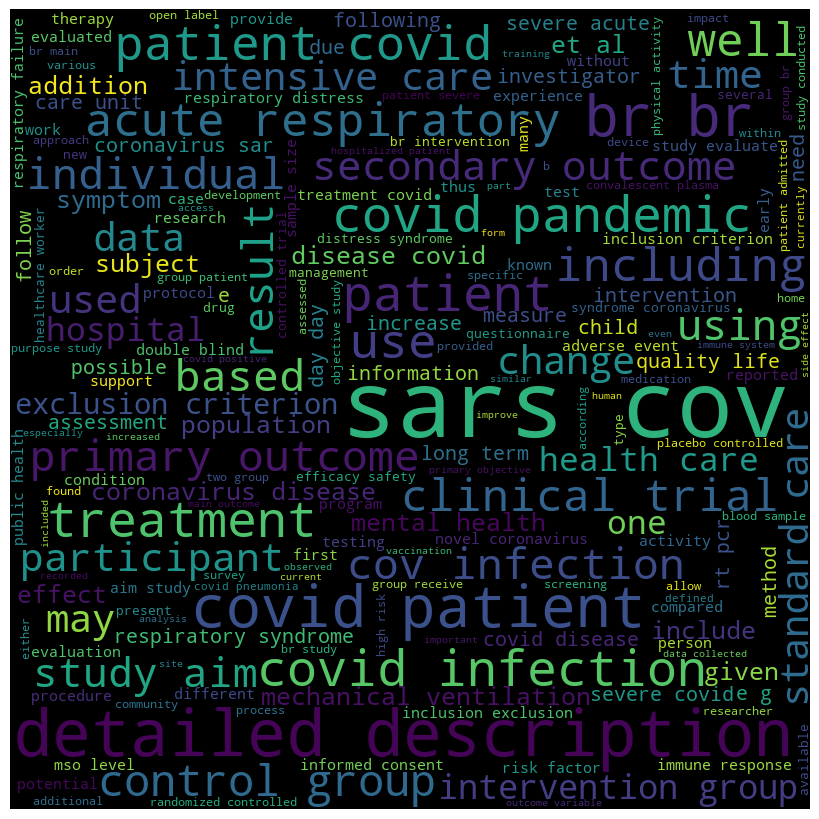

In [22]:
#Final word cloud after all the cleaning and pre-processing
from wordcloud import WordCloud
from textwrap import wrap
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
#comment_words = ' '
stopwords = set(STOPWORDS) 
from pandas.core.common import flatten

# iterate through the csv file 
comment_words=flatten(x)
comment_words=' '.join(comment_words)

wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='black', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show();

# Training skipgram model


In [23]:
# training the model

skipgram = Word2Vec(x, vector_size =50, window =3, min_count=2, sg = 1)
print(skipgram)
skipgram.save('../output/skipgramx1.bin')

Word2Vec<vocab=24877, vector_size=50, alpha=0.025>


In [24]:
# training the model

skipgram = Word2Vec(x, vector_size =100, window = 1, min_count=2,sg = 1)
print(skipgram)
skipgram.save('../output/skipgramx11.bin')

Word2Vec<vocab=24877, vector_size=100, alpha=0.025>


In [25]:
# Loading the model
skipgram = Word2Vec.load('../output/skipgramx11.bin')

# Training Fasttext model

In [28]:
#training fasttext Model, with skipgram
fast_n= FastText(x,vector_size=200, window=3, min_count=2, workers=5, min_n=1, max_n=2,sg=1)

#Saving our model
fast_n=fast_n.save('../output/fast_p.bin')

In [29]:
#Loading our pretrained model
fast_n = Word2Vec.load('../output/fast_p.bin')

In [30]:
FastText=FastText(x,vector_size=100, window=2, min_count=2, workers=5, min_n=1, max_n=2,sg=1)

#Saving our model
FastText.save('../output/FastText.bin')

#Loading our pretrained model
FastText = Word2Vec.load('../output/FastText.bin')

## Model embeddings - Similarity

In [31]:
# Similar words - skipgram

skipgram.wv.most_similar(positive=['corona'],topn=10)

[('coronavirus', 0.7520668506622314),
 ('covid', 0.7033588290214539),
 ('evd', 0.6848452091217041),
 ('novelty', 0.6793174743652344),
 ('crown', 0.6763672828674316),
 ('ebola', 0.6710224747657776),
 ('virulent', 0.6631223559379578),
 ('declares', 0.6626360416412354),
 ('betacoronavirus', 0.6617233753204346),
 ('coronovirus', 0.6607444882392883)]

In [32]:
skipgram.wv.most_similar(positive=['patient'],topn=10)

[('hospitalised', 0.7453873753547668),
 ('subject', 0.7425243854522705),
 ('participant', 0.7338211536407471),
 ('individual', 0.7328789234161377),
 ('acutely', 0.7300766706466675),
 ('moderately', 0.7205392718315125),
 ('recovering', 0.7113196849822998),
 ('survivor', 0.6956931352615356),
 ('pwcf', 0.6928128600120544),
 ('lymphocytopenia', 0.6909356713294983)]

In [33]:
# Similar words - fasttext

FastText.wv.most_similar(positive=['lung'],topn=10)

[('lungiq', 0.7775217890739441),
 ('leung', 0.7336029410362244),
 ('volunteering', 0.7035090923309326),
 ('laung', 0.6887965202331543),
 ('clungene', 0.6885291337966919),
 ('unsolved', 0.6762067079544067),
 ('voluntary', 0.6759730577468872),
 ('silicovilung', 0.6734711527824402),
 ('lure', 0.6695070862770081),
 ('lupus', 0.6677412390708923)]

In [34]:
FastText.wv.most_similar(positive=['breathing'],topn=10)

[('rebreathing', 0.9134269952774048),
 ('breaching', 0.9050416946411133),
 ('breathe', 0.8894879221916199),
 ('bathing', 0.8675966262817383),
 ('breaking', 0.8610057830810547),
 ('breathed', 0.8608796000480652),
 ('breath', 0.8589882254600525),
 ('babybreathe', 0.8427689075469971),
 ('thing', 0.8355955481529236),
 ('breathable', 0.8323744535446167)]

# PCA Plot - Skipgram

In [36]:
skipgram.wv[skipgram.wv.index_to_key] 

array([[ 0.5232059 ,  0.19285028,  0.25837147, ...,  0.1606447 ,
        -0.17508128, -0.16054066],
       [ 0.16592406, -0.09823865,  0.12976201, ..., -0.4360522 ,
        -0.25745663,  0.2486272 ],
       [ 0.11894661,  0.14447033, -0.05498285, ..., -0.06495791,
         0.12576813, -0.32626137],
       ...,
       [-0.01925619,  0.06245386,  0.02846529, ..., -0.06518561,
        -0.00528214, -0.00346388],
       [-0.04311264,  0.06662949,  0.04182314, ..., -0.03533474,
         0.02059775,  0.02149695],
       [-0.0061496 ,  0.05301503, -0.02588641, ..., -0.09038581,
        -0.01293288, -0.00400454]], dtype=float32)

In [37]:
X = skipgram.wv[skipgram.wv.index_to_key]    #stroing arrays of all words
pca = PCA(n_components=2)                    #applying PCA to convert data into two dimensions
result = pca.fit_transform(X)

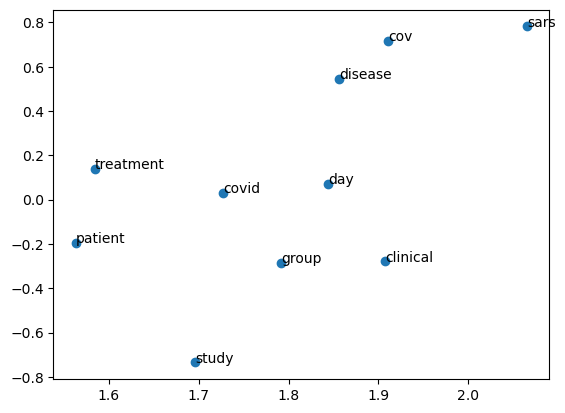

In [39]:
#words embeddings on the plot to check 2-D representation of each word
pyplot.scatter(result[:10, 0], result[:10, 1])
words = list(skipgram.wv.index_to_key)
for i, word in enumerate(words[:10]):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show();

# PCA Plot - Fasttest

In [40]:
FastText.wv[FastText.wv.index_to_key]

array([[-0.53011316,  0.03774176, -0.5632816 , ...,  0.44744036,
        -0.10166748, -0.04356013],
       [-0.36517957,  0.12177487, -0.69460386, ...,  0.10299209,
         0.02098354, -0.16559586],
       [-0.8389415 ,  0.12026343, -0.4607849 , ...,  0.03751632,
        -0.28092185,  0.12388992],
       ...,
       [-0.5885283 ,  0.10330658, -1.1424302 , ..., -0.1723161 ,
        -0.22513661,  0.2723833 ],
       [-0.32337773, -0.11001377, -0.33761016, ...,  0.6597231 ,
         0.08358494,  0.21689081],
       [-0.3831202 , -0.42731112, -0.9936627 , ...,  0.53648055,
        -0.30689624,  0.4099795 ]], dtype=float32)

In [41]:
#same thing as above but with fasttext model
X_fast = FastText.wv[FastText.wv.index_to_key]
pca = PCA(n_components=2)
result_fast = pca.fit_transform(X_fast)

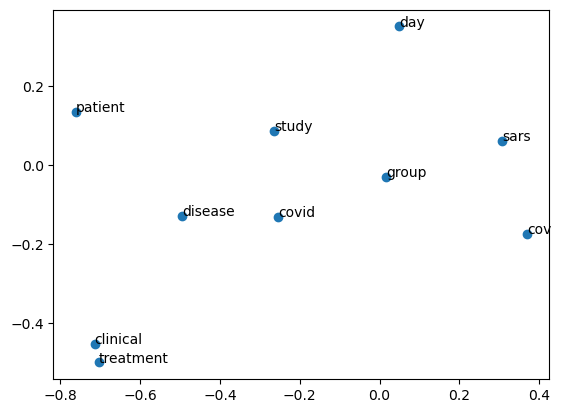

In [42]:
pyplot.scatter(result_fast[:10, 0], result_fast[:10, 1])
words = list(FastText.wv.index_to_key)
for i, word in enumerate(words[:10]):
    pyplot.annotate(word, xy=(result_fast[i, 0], result_fast[i, 1]))
pyplot.show();

# Getting Vectors for each abstract


In [43]:
vector_size=100   #defining vector size for each word

### Method 1

In [46]:
#function to take average of all vectors of each word in abstract, so that each abstract can represent (1,100) dimensional vector

K1=[]      #creating list to store vector representation of each abstract

for i in range(covid_df.shape[0]):       #iterating through all abstract
    K=np.zeros([vector_size,1])    #creating empty array of size (vec_size,1) to add vector representation of each word
    count=0                        #creating count to check how many words are used from abstract
    
    for word in word_tokenize(covid_df['Abstract'][i]):   #iterating through all words in given abstract

        if word in list(FastText.wv.index_to_key):      #if word exists in vocab , increase count by 1 and add array of given words in our defined array K

            count+=1
            K+=FastText.wv[word].reshape(vector_size,1)
    K=K/count                                        #taking average of given array
    K1.append(list(K))                               #appending vector of given abstract to the initial defined list
K1_array=np.array(K1)
K1_array=K1_array.reshape(covid_df.shape[0],vector_size)   #converting into array of shape(no. of rows, vector_size)

**Method 1 will take time to run. Method 2 is prefered.**

### Method 2

In [47]:
def get_mean_vector(word2vec_model, words):
    # remove out-of-vocabulary words
    words = [word for word in tokenize(words) if word in list(word2vec_model.wv.index_to_key)] #if word is in vocab 
    if len(words) >= 1:
        return np.mean(word2vec_model.wv[words], axis=0)
    else:
        return np.array([0]*100)


### Abstract to vectors using skipgram Model

In [48]:
K1=[]                                     #defining empty list
for i in covid_df.Abstract:
    K1.append(list(get_mean_vector(skipgram, i)))     #appending array to the list
    

K11=pd.DataFrame(K1).transpose()    # Saving vectors of each abstract in data frame so that we can use directly while running code again
K11.to_csv('../output/skipgram-vec.csv')

In [49]:
K=pd.read_csv('../output/skipgram-vec.csv')   #Loading our pretrained vectors of each abstract

skipgram_vectors=[]                          #transforming dataframe into required array like structure as we did in above step
for i in range(covid_df.shape[0]):
    skipgram_vectors.append(K[str(i)].values)

### For converting Title into vectors using skipgram

In [50]:
K1_title=[]
for i in covid_df.Title:         #instead of abstract use title
    K1_title.append(list(get_mean_vector(skipgram, i)))    

# Saving vectors of each abstract in data frame so that we can use directly while running code again
K1_title=pd.DataFrame(K1).transpose()
K1_title.to_csv('../output/skipgram-vec-title.csv')    

In [51]:
K=pd.read_csv('../output/skipgram-vec-title.csv')   #Loading our pretrained vectors of each abstract

K2_title=[]                          #transforming dataframe into required array like structure as we did in above step
for i in range(covid_df.shape[0]):
    K2_title.append(K[str(i)].values)

### Abstract to vector using FastText 

In [52]:
K_fast=[]                                     #defining empty list
for i in covid_df.Abstract:
    K_fast.append(list(get_mean_vector(FastText, i)))     #appending array to the list
    
K11=pd.DataFrame(K_fast).transpose()    # Saving vectors of each abstract in data frame so that we can use directly while running code again
K11.to_csv('../output/FastText-vec.csv')

In [53]:
data=pd.read_csv('../output/FastText-vec.csv')   #Loading our pretrained vectors of each abstract

fast_vectors=[]                          #transforming dataframe into required array like structure as we did in above step
for i in range(covid_df.shape[0]):
    fast_vectors.append(data[str(i)].values)

# Cosine similarity function

In [56]:
#defining function to define cosine similarity

from numpy import dot
from numpy.linalg import norm

def cos_sim(a,b):

    return dot(a, b)/(norm(a)*norm(b)) 

# Input query Preprocessing

In [57]:
#Preprocessing input, because input should be in same form as training data set

def preprocessing_input(query, word2vec_model):
    query=preprocessing(query)
    query=query.replace('\n',' ')
    K=get_mean_vector(word2vec_model,query)

    return K   

# Function to return 'n' similar results

In [58]:
pd.set_option("display.max_colwidth", -1)       #this function will display full text from each column

In [59]:
#function to return top n similar results

#query - input query
# p - average vectors for all abs
#df1 - original

def top_n(query,p,covid_df2,model):    
    print(query)
    
    query=preprocessing_input(query,model)    #preprocessing input to list of vectors
                                    
    x=[]
    #Converting cosine similarities of overall data set with input queries into LIST
    for i in range(len(p)):
        x.append(cos_sim(query,p[i]))
    
    
 #store list in tmp to retrieve index
    tmp=list(x)
    
 #sort list so that largest elements are on the far right
    
    res = sorted(range(len(x)), key = lambda sub: x[sub])[-5:]
    sim=[tmp[i] for i in reversed(res)]
    print(sim)
 #get index of the 10 or n largest element
    L=[]
    for i in reversed(res):
    
        L.append(i)
    return covid_df2.iloc[L, [1,2,5,6]],sim     #returning dataframe (only id,title,abstract ,publication date)

In [ ]:
#kidney
#breathing
#lung failure

## Result Evaluation

In [61]:
# skipgram model

#Input your search query here

Query = "lung failure"

Results,sim = top_n(Query,skipgram_vectors,covid_df2,skipgram)
Results

lung failure
[0.8065366904264726, 0.8032533568983078, 0.7945330545353438, 0.7945135718841738, 0.7849019656756352]


,Trial ID,Title,Abstract,Publication date
548,2021-000988-68,Immune response after covid-19 vaccination in patients with renal failure stadium 4 or 5 .,Renal failure stage 4 and 5.,2021-03-31
4235,NCT04597853,"Assessment of Lung Mechanics in SARS-CoV-2/ COVID-19 Acute Respiratory Distress Syndrome: A Holistic, Longitudinal Analysis of the Lung-heart-ventilator Interaction","This study is meant to assess the lung mechanics in SARS-CoV-2 induced acute respiratory failure. A precise characterisation of lung mechanics and heart-lung-interactions might allow a better understanding of SARS-CoV-2 induced acute respiratory failure and thus lead to better mechanical ventilation strategies. This monocentric, observational study of critically ill COVID-19 patients in the ICU, will employ impedance tomography, right-heart catheterization, oesophageal pressure measurements, indirect calorimetry as well as classic mechanical ventilation parameters to characterise the mechanical characteristics of the lung as well as the heart-lung interactions in SARS-CoV-2 induced acute respiratory failure.",2021-03-01
7831,2020-001807-18,"A Phase 2, Randomized, Double-Blind, Placebo-Controlled, Parallel-group, Multi-center Study of an Inhaled Pan-Janus Kinase Inhibitor, TD-0903, to Treat Symptomatic Acute Lung Injury Associated with COVID-19",Acute lung injury associated with COVID-19,2020-10-13
9785,2020-001236-10,"COUNTER-COVID - Oral imatinib to prevent pulmonary vascular leak in Covid19 a randomized, double --blind, placebo controlled, clinical trial in patients with severe Covid19 disease","Covid19 is characterized by hypoxemic respiratory failure, caused by extensive vascular leak and pulmonary edema early in the course of disease.",2020-12-10
10124,CHICTR2000030578,Clinical Prediction and Intervention of Pulmonary Function Impairment in Patients with Novel Coronavirus Pneumonia (COVID-19),"1. Establish a cohort of survivors of new coronavirus pneumonia, track their lung function damage and changes after discharge, and establish a predictive model of lung function impairment of new coronavirus pneumonia;\n2. Explore lung rehabilitation in patients with impaired lung function effect.",2020-02-01


In [62]:
# fasttext model

#Input your search query here

Query = "breathe"

Results,sim=top_n(Query,fast_vectors,covid_df2,FastText)
Results

breathe
[0.7707223297892546, 0.7558500067458626, 0.7522140488178485, 0.7501499413804497, 0.7489257671761048]


,Trial ID,Title,Abstract,Publication date
3386,CHICTR2000040388,A prospective randomized control study comparing modified oropharyngeal airway with Guedel's airway for tracheal tube exchange and smooth extubation in gynecological laparoscopic surgery,"With the outbreak of COVID-19, extubation and cough in patients with perioperative intubation during recovery has become a more serious problem. Extubation under deep anesthesia can reduce the reflex of cough to a certain extent and reduce the spread of the epidemic.However, extubation under deep anesthesia may cause respiratory obstruction, and the placement of oropharyngeal airway after extubation can keep the pharynx unblocked and normal breathing.But the traditional oropharyngeal airway can induce restlessness, nausea, vomiting, coughing and even increased heart rate and blood pressure.\nIn this study, the hemodynamic fluctuation and choking were observed after the traditional oropharyngeal airway (OROPharyngeal airway) and the improved oropharyngeal airway (ORopharyngeal airway) were placed after extubation, so as to provide some evidences to support the extensive clinical application of such improved oropharyngeal airway (ORopharyngeal airway).",2020-11-01
3272,NCT04649931,Study to Evaluate Whether Differences in Exhaled Breath Can be Identified Using Ion Mobility Spectrometry (IMS) in Subjects Tested Positive for SARS-CoV-2 Infection and Subjects Tested Negative,Breath gas analysis is the evaluation of exhaled breath. It aims to evaluate the volatile organic compounds (VOCs) in exhaled breath. In this feasibility study it is intended to find specific peaks/pattern in exhaled breath indicating an infection with SARS-CoV-2 (severe acute respiratory syndrome coronavirus 2).,2020-12-14
678,2021-001144-98,The use of amantadine in the prevention of progression and treatment of COVID-19 symptoms in patients infected with the SARS-CoV-2 virus,"SARS-CoV-2 infection with one or more of the following symptoms: fever, cough, muscle aches, mild breathlessness, chest pain, diarrhea, nausea, vomiting, anosmia, lack of taste, sore throat, nasal congestion",2021-03-11
1873,NCT04764032,Right Ventricular Dysfunction in Ventilated Patients With COVID-19,"Using echocardiography to investigate the incidence of RV dysfunction in ventilated patients with COVID-19.\n\nDetailed Description\nINTRODUCTION Following the first reported cases in China, there has been a worldwide pandemic of a new virus commonly known as, Coronavirus. The virus causes a number of conditions including; cough, high temperature, painful muscles and breathing difficulties. The disease the virus causes is known as Coronavirus Disease 2019 (COVID-19). In the majority of cases these symptoms will get better without any treatment and without needing admission to hospital. In a small proportion of cases, the symptoms can be so bad that patients will need admission to hospital. Of the group admitted to hospital an even smaller group (approximately 5% of all confirmed coronavirus cases) will need treatment in an intensive care unit. This is often for severe breathing difficulties and sometimes requires the patient to be put on a breathing machine. The breathing machine is also known as a life support machine or ventilator and needing its support is known as 'ventilation' or 'being ventilated'. In other conditions causing severe breathing difficulties requiring ventilation, pressure can be put on the right side of the heart ('the right heart [or right ventricle];' the part of the heart pumping blood to the lungs). This can cause the right heart to fail, struggling to pump blood forward and with a build-up of back pressure. This is also known as right heart (or ventricular) dysfunction. Patients needing ventilated, who develop problems with the right heart, are less likely to survive their intensive care stay. No scientists have examined whether patients with COVID-19, requiring ventilation, have problems with their right heart. METH

# Streamlit App (Refer Medical.py file to run the app)

In [63]:
#streamlit function 
def main():
    # Load data and models
    data = covid_df2     #our data which we have to display
    model = top_n        #top_n model to return n similar results
    

    st.title("Medical Search engine")      #title of our app
    st.write('Type your query here')       #text below title

    # User search
    user_input = st.text_input("Search box")   #getting input from user

   
    # Fetch results
    if user_input:
        
        P,sim =model(str(user_input),K2,data)     #storing our output dataframe in P
        #Plotly function to display our dataframe in form of plotly table
        fig = go.Figure(data=[go.Table(header=dict(values=['ID', 'Title','Abstract','Publication Date','Similarity']),cells=dict(values=[list(P['Trial ID'].values),list(P['Title'].values), list(P['Abstract'].values),list(P['Publication date'].values),list(np.around(sim,4))],align='center'))])
        #displying our plotly table
        fig.update_layout(height=1700) 
        st.plotly_chart(fig) 
        # Get individual results
    
if __name__ == "__main__":
    main()

2023-12-30 09:33:13.337 
  command:

    streamlit run C:\ProgramData\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [21]:
!pip freeze > requirements.txt